In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
session = Session(engine)

In [9]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
measurement_results = session.query(Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs).all()
station_results = session.query(Stations.station, Stations.latitude, Stations.longitude, Stations.elevation).all()

In [12]:
measurement_results

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [13]:
station_results

[('USC00519397', 21.2716, -157.8168, 3.0),
 ('USC00513117', 21.4234, -157.8015, 14.6),
 ('USC00514830', 21.5213, -157.8374, 7.0),
 ('USC00517948', 21.3934, -157.9751, 11.9),
 ('USC00518838', 21.4992, -158.0111, 306.6),
 ('USC00519523', 21.33556, -157.71139, 19.5),
 ('USC00519281', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 21.3152, -157.9992, 0.9),
 ('USC00516128', 21.3331, -157.8025, 152.4)]

In [14]:
measurement_satation_id = [result[0] for result in measurement_results[:]]
measurement_date = [result[1] for result in measurement_results[:]]
prcp = [result[2] for result in measurement_results[:]]
tobs = [result[3] for result in measurement_results[:]]
prcp

[0.08,
 0.0,
 0.0,
 0.0,
 None,
 0.06,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.12,
 0.0,
 None,
 0.03,
 0.01,
 None,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.12,
 0.08,
 0.03,
 0.0,
 0.43,
 0.06,
 None,
 0.0,
 0.0,
 0.0,
 0.06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.17,
 0.15,
 0.27,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.04,
 0.01,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.2,
 0.08,
 0.01,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.05,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,

In [15]:
station_id = [result[0] for result in station_results[:]]
station_lat = [result[1] for result in station_results[:]]
station_lng = [result[2] for result in station_results[:]]
station_elevation = [result[3] for result in station_results[:]]
station_id

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [16]:
measurement_frame = pd.DataFrame(measurement_results[:], columns=['station', 'date', 'prcp', 'tobs'])
measurement_frame

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [17]:
station_frame = pd.DataFrame(station_results[:], columns=['station', 'lat', 'lng', 'elevation'])
station_frame.head(30)

,station,lat,lng,elevation
0,USC00519397,21.27160,-157.81680,3.0
1,USC00513117,21.42340,-157.80150,14.6
2,USC00514830,21.52130,-157.83740,7.0
3,USC00517948,21.39340,-157.97510,11.9
4,USC00518838,21.49920,-158.01110,306.6
5,USC00519523,21.33556,-157.71139,19.5
6,USC00519281,21.45167,-157.84889,32.9
7,USC00511918,21.31520,-157.99920,0.9
8,USC00516128,21.33310,-157.80250,152.4


In [18]:
measurement_station_frame = pd.merge(measurement_frame, station_frame, how='left', on=['station', 'station'])
measurement_station_frame

,station,date,prcp,tobs,lat,lng,elevation
0,USC00519397,2010-01-01,0.08,65.0,21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63.0,21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74.0,21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76.0,21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73.0,21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,21.3331,-157.8025,152.4
19546,USC00516128,2017-08-20,NaN,78.0,21.3331,-157.8025,152.4
19547,USC00516128,2017-08-21,0.56,76.0,21.3331,-157.8025,152.4
19548,USC00516128,2017-08-22,0.50,76.0,21.3331,-157.8025,152.4


In [19]:
measurement_station_frame['station'].nunique()

9

In [20]:
measurement_station_frame['station'].value_counts(ascending=False)

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [21]:
measurement_station_frame['date']= pd.to_datetime(measurement_station_frame['date'])

In [22]:
date_prcp = pd.DataFrame(measurement_station_frame[:], columns=['date','prcp'])
date_prcp

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [23]:
last_year = measurement_station_frame.set_index('date').last("12M")
last_year

,station,prcp,tobs,lat,lng,elevation
date,,,,,,
2016-09-01,USC00519281,0.02,80.0,21.45167,-157.84889,32.9
2016-09-02,USC00519281,0.01,80.0,21.45167,-157.84889,32.9
2016-09-03,USC00519281,0.12,78.0,21.45167,-157.84889,32.9
2016-09-04,USC00519281,0.14,78.0,21.45167,-157.84889,32.9
2016-09-05,USC00519281,0.03,78.0,21.45167,-157.84889,32.9
...,...,...,...,...,...,...
2017-08-19,USC00516128,0.09,71.0,21.33310,-157.80250,152.4
2017-08-20,USC00516128,NaN,78.0,21.33310,-157.80250,152.4
2017-08-21,USC00516128,0.56,76.0,21.33310,-157.80250,152.4


In [24]:
last_year['station'].value_counts(ascending=False)

USC00516128    2612
USC00511918    1979
USC00519281     343
Name: station, dtype: int64

In [25]:
date_prcp_index = last_year['prcp']
date_prcp_index

date
2016-09-01    0.02
2016-09-02    0.01
2016-09-03    0.12
2016-09-04    0.14
2016-09-05    0.03
              ... 
2017-08-19    0.09
2017-08-20     NaN
2017-08-21    0.56
2017-08-22    0.50
2017-08-23    0.45
Name: prcp, Length: 4934, dtype: float64

In [26]:
last_year_prcp = pd.DataFrame(date_prcp_index[:], columns=['prcp'])
last_year_prcp

,prcp
date,
2016-09-01,0.02
2016-09-02,0.01
2016-09-03,0.12
2016-09-04,0.14
2016-09-05,0.03
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [27]:
prcp_inches = last_year_prcp['prcp'] * 12
prcp_inches

date
2016-09-01    0.24
2016-09-02    0.12
2016-09-03    1.44
2016-09-04    1.68
2016-09-05    0.36
              ... 
2017-08-19    1.08
2017-08-20     NaN
2017-08-21    6.72
2017-08-22    6.00
2017-08-23    5.40
Name: prcp, Length: 4934, dtype: float64

In [28]:
date_tobs_index = last_year['tobs']
date_tobs_index

date
2016-09-01    80.0
2016-09-02    80.0
2016-09-03    78.0
2016-09-04    78.0
2016-09-05    78.0
              ... 
2017-08-19    71.0
2017-08-20    78.0
2017-08-21    76.0
2017-08-22    76.0
2017-08-23    76.0
Name: tobs, Length: 4934, dtype: float64

In [29]:
last_year_tobs = pd.DataFrame(date_tobs_index[:], columns=['tobs'])
last_year_tobs

,tobs
date,
2016-09-01,80.0
2016-09-02,80.0
2016-09-03,78.0
2016-09-04,78.0
2016-09-05,78.0
...,...
2017-08-19,71.0
2017-08-20,78.0
2017-08-21,76.0


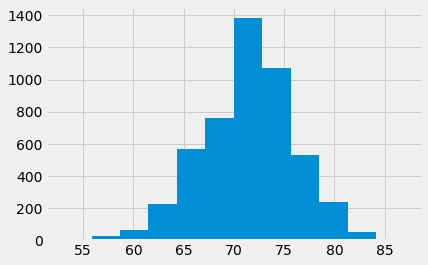

In [30]:
year_tobs = last_year['tobs']
plt.hist(year_tobs, bins=12)
plt.show()

In [36]:
most_frq_station = measurement_station_frame[measurement_station_frame['station']=='USC00519281']
most_frq_station

,station,date,prcp,tobs,lat,lng,elevation
12187,USC00519281,2010-01-01,0.15,70.0,21.45167,-157.84889,32.9
12188,USC00519281,2010-01-02,0.00,62.0,21.45167,-157.84889,32.9
12189,USC00519281,2010-01-03,0.00,74.0,21.45167,-157.84889,32.9
12190,USC00519281,2010-01-04,0.00,75.0,21.45167,-157.84889,32.9
12191,USC00519281,2010-01-05,0.00,74.0,21.45167,-157.84889,32.9
...,...,...,...,...,...,...,...
14954,USC00519281,2017-08-14,0.00,77.0,21.45167,-157.84889,32.9
14955,USC00519281,2017-08-15,0.32,77.0,21.45167,-157.84889,32.9
14956,USC00519281,2017-08-16,0.12,76.0,21.45167,-157.84889,32.9
14957,USC00519281,2017-08-17,0.01,76.0,21.45167,-157.84889,32.9


In [37]:
frq_station_year = most_frq_station.set_index('date').last("12M")
frq_station_year

,station,prcp,tobs,lat,lng,elevation
date,,,,,,
2016-09-01,USC00519281,0.02,80.0,21.45167,-157.84889,32.9
2016-09-02,USC00519281,0.01,80.0,21.45167,-157.84889,32.9
2016-09-03,USC00519281,0.12,78.0,21.45167,-157.84889,32.9
2016-09-04,USC00519281,0.14,78.0,21.45167,-157.84889,32.9
2016-09-05,USC00519281,0.03,78.0,21.45167,-157.84889,32.9
...,...,...,...,...,...,...
2017-08-14,USC00519281,0.00,77.0,21.45167,-157.84889,32.9
2017-08-15,USC00519281,0.32,77.0,21.45167,-157.84889,32.9
2017-08-16,USC00519281,0.12,76.0,21.45167,-157.84889,32.9


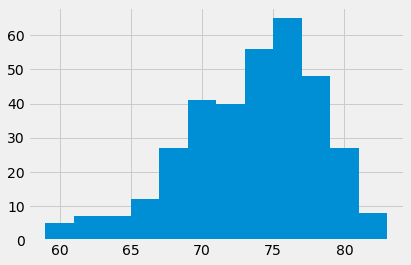

In [38]:
most_frq_tobs = frq_station_year['tobs']
plt.hist(most_frq_tobs, bins=12)
plt.show()

In [39]:
last_year_prcp

,prcp
date,
2016-09-01,0.02
2016-09-02,0.01
2016-09-03,0.12
2016-09-04,0.14
2016-09-05,0.03
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


ConversionError: Failed to convert value(s) to axis units: ['2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01']

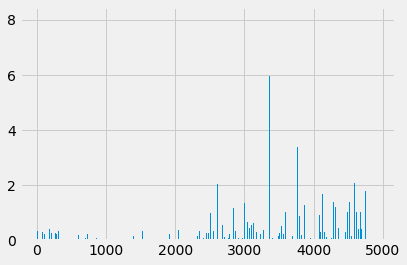

In [43]:
year_prcp = last_year_prcp['prcp']
xticks = ['2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', 
          '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01' ]
year_prcp.plot(kind='bar', xticks=xticks)

C:\Users\audri\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


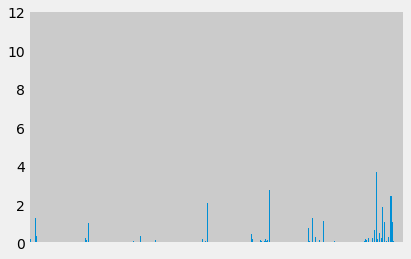

In [46]:
total_prcp = measurement_station_frame['prcp']
subplot = total_prcp.plot(kind='bar')
ax = subplot.axes
#ax.set_xticks([])       # Alternatively, you can manually adjust the ticks
ax.set_xticklabels([])   # or their labels
f = ax.get_figure()
f.show()

In [48]:
# reflect an existing database into a new model
last_year['prcp'].max()
# reflect the tables

8.06

C:\Users\audri\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


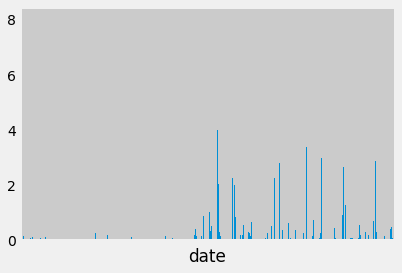

In [50]:
year_prcp = last_year['prcp']
subplot = year_prcp.plot(kind='bar')
ax = subplot.axes
#ax.set_xticks([])       # Alternatively, you can manually adjust the ticks
ax.set_xticklabels([])   # or their labels
f = ax.get_figure()
f.show()

In [ ]:
# We can view all of the classes that automap found

In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
